# **CUSTOMER LIFE TIME VALUE PREDICTION**

## About Online Retail Dataset

This Online Retail data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Attribute Information:

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_excel('/content/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
df.shape

(541910, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
original_data = df.copy()

## Data Cleaning

In [7]:
## Checking for missing values
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


In [8]:
# Removing customer ID with missing details
df = df.dropna(subset=['Customer ID'])

In [9]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [10]:
# NO missing values present

In [11]:
## Now removing cancelled transactions (Invoice starts with 'C')
df[df['Invoice'].astype(str).str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [12]:
df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [13]:
# 8905 cancelled transactions removed from the dataset

In [14]:
df.shape

(397925, 8)

In [15]:
df['Quantity'][df["Quantity"]<0]

,Quantity


In [16]:
df['Quantity'][df["Quantity"]<0].sum()

np.int64(0)

In [17]:
# No negative number present in the Quantity

In [18]:
df['Price'][df["Price"]<0].sum()

np.float64(0.0)

In [19]:
df['Price'][df["Price"]<0]

,Price


In [20]:
# No negative number present in the Price

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397925 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397925 non-null  object        
 1   StockCode    397925 non-null  object        
 2   Description  397925 non-null  object        
 3   Quantity     397925 non-null  int64         
 4   InvoiceDate  397925 non-null  datetime64[ns]
 5   Price        397925 non-null  float64       
 6   Customer ID  397925 non-null  float64       
 7   Country      397925 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [22]:
# Converting Customer ID to integer for consistency
df['Customer ID'] = df['Customer ID'].astype(int)

In [23]:
# Creating Total Price column
df['TotalPrice'] = df['Quantity'] * df['Price']

In [24]:
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,int64
Country,object
TotalPrice,float64


In [25]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [26]:
df.shape

(397925, 9)

In [27]:
# Summary statistics
summary_stats = df[['Quantity', 'Price', 'TotalPrice']].describe()


In [28]:
# Summary statistics
summary_stats = df[['Quantity', 'Price', 'TotalPrice']].describe()

In [29]:
summary_stats

,Quantity,Price,TotalPrice
count,397925.000000,397925.000000,397925.000000
mean,13.021793,3.116212,22.394737
std,180.419984,22.096773,309.055200
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.680000
50%,6.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


In [30]:
## Calculating Outliers in the dataset
# Calculate Q1, Q3, and IQR
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
outliers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
13,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583,France,40.80
44,536370,22492,MINI PAINT SET VINTAGE,36,2010-12-01 08:45:00,0.65,12583,France,23.40
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100,United Kingdom,350.40
...,...,...,...,...,...,...,...,...,...
541835,581579,23581,JUMBO BAG PAISLEY PARK,40,2011-12-09 12:19:00,1.79,17581,United Kingdom,71.60
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777,United Kingdom,66.60
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84


In [31]:
print(Q1, Q3)

2.0 12.0


In [32]:
print(lower_bound, upper_bound)

-13.0 27.0


In [33]:
df['Quantity'][df['Quantity']>27].count()

np.int64(25656)

In [34]:
df['Quantity'][df['Quantity']<-13].count()

np.int64(0)

In [35]:
# Removing Outliers from the dataset
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

In [36]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


## Data Visualization

In [37]:
# Prepare plots
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

(0.0, 500.0)

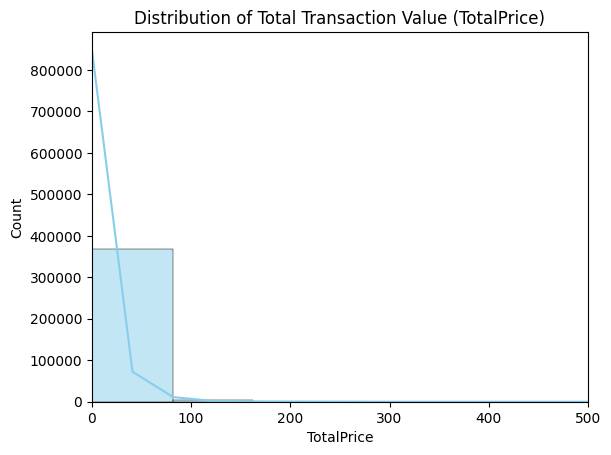

In [38]:
# 1. Distribution of TotalPrice

sns.histplot(df['TotalPrice'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Total Transaction Value (TotalPrice)')
plt.xlabel('TotalPrice')
plt.xlim(0, 500)

/tmp/ipython-input-39-1857942712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


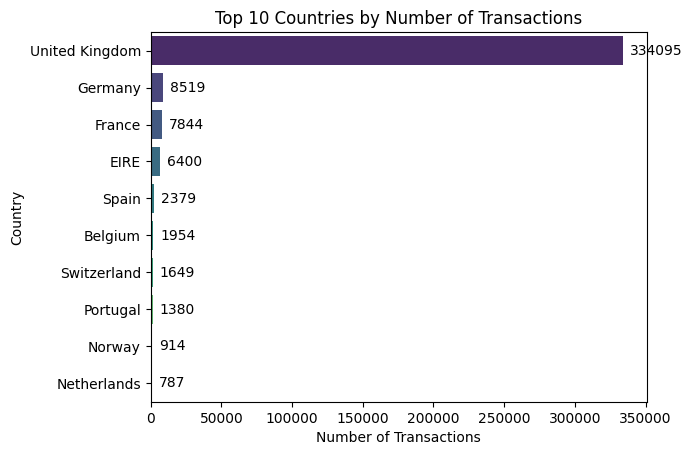

In [39]:
# 2. Top 10 countries by number of transactions

top_countries = df['Country'].value_counts().head(10)
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

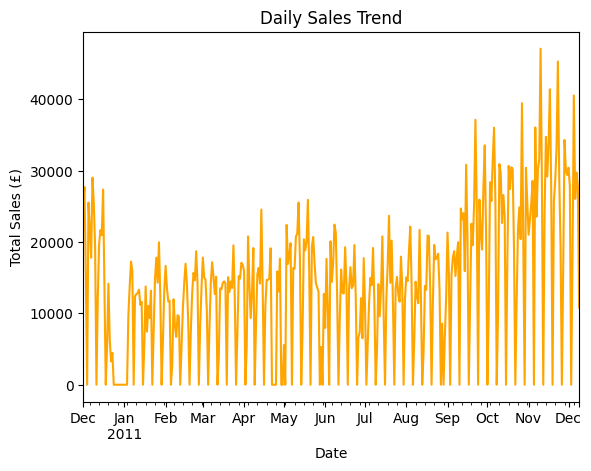

In [40]:
# 3. Sales trend over time (daily)

daily_sales = df.set_index('InvoiceDate').resample('D')['TotalPrice'].sum()
daily_sales.plot(ax=plt.gca(), color='orange')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.show()

/tmp/ipython-input-41-1404381358.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='mako')


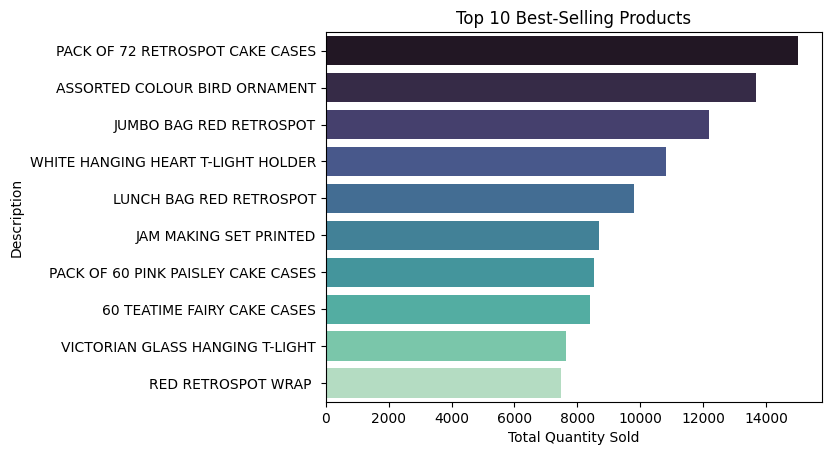

In [41]:
# 4. Top 10 best-selling products

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='mako')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.show()

/tmp/ipython-input-42-488531088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_customers.index.astype(str), x=top_customers.values, palette='crest')


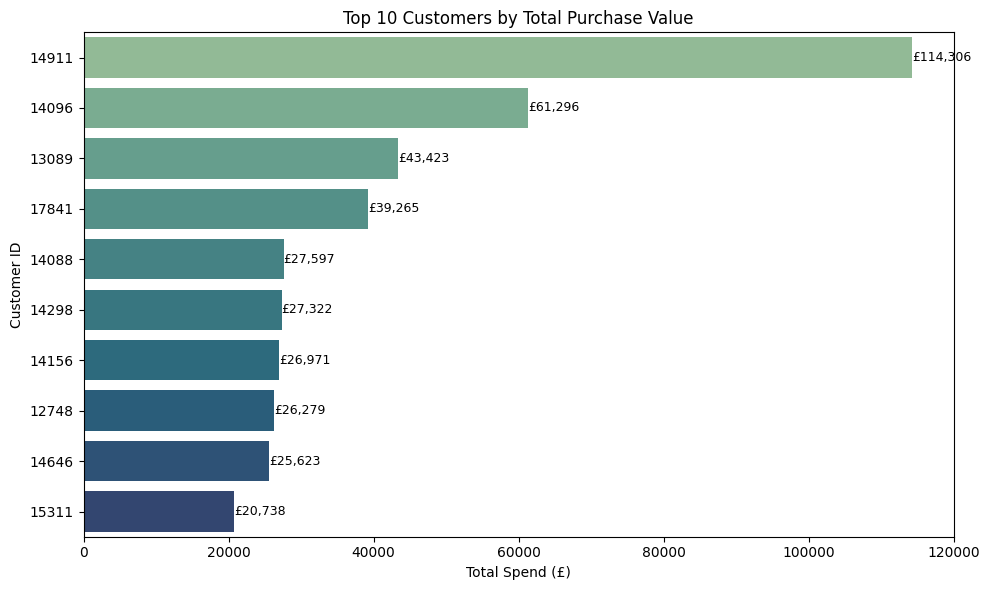

In [42]:
# 5. Top 10 Customers based on TotalPrice

top_customers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_customers.index.astype(str), x=top_customers.values, palette='crest')
# Add value labels to bars
for i, v in enumerate(top_customers.values):
    ax.text(v + 5, i, f'£{v:,.0f}', va='center', fontsize=9)

plt.title('Top 10 Customers by Total Purchase Value')
plt.xlabel('Total Spend (£)')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

## Feature Engineering

### Our goal is to build features at the customer level that capture:

* Past behavior (e.g., frequency, recency, monetary value)

* Demographics (Country)

* Purchase patterns (e.g., average basket size, average days between purchases)



### Key Features to Create:
1. **Recency**
:- Days since the customer's last purchase relative to a fixed date (snapshot_date).

2. **Frequency**
:-Total number of purchases (unique invoices) per customer.Counting the number of unique invoices per customer.

3. **Monetary Value**
:-Total spending per customer.

4. **Average Basket Size**
:-Average quantity per invoice.(Average Basket Size = Total Quantity / Frequency)
5. **Average Unit Price**
:- Mean unit price paid by the customer.
6. **Average Days Between Purchases**
:- Mean time gap between consecutive purchases.
7. **Customer Age in Dataset**
:-Days between first and last purchase

In [43]:
## Choosing a reference date (snapshot_date) slightly beyond (after 1 day) our latest invoice date to calculate Recency.
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [44]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [45]:
pd.Timedelta(days=1)

Timedelta('1 days 00:00:00')

In [46]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [47]:
# Group by customer
cltv_df = df.groupby('Customer ID').agg({
    'InvoiceDate': [
        lambda x: (snapshot_date - x.max()).days,     # Recency
        lambda x: (x.max() - x.min()).days,           # Customer age
        'count'                                       # Frequency (number of transactions)
    ],
    'Invoice': 'nunique',                             # Unique invoices
    'Quantity': 'sum',
    'TotalPrice': ['sum', 'mean'],                    # Monetary
    'Price': 'mean'
})

In [48]:
# Rename columns
cltv_df.columns = ['Recency', 'Customer_Age', 'Frequency', 'Unique_Invoices',
                   'Total_Quantity', 'Total_Revenue', 'Avg_Revenue', 'Avg_UnitPrice']

cltv_df = cltv_df.reset_index()

In [49]:
cltv_df

,Customer ID,Recency,Customer_Age,Frequency,Unique_Invoices,Total_Quantity,Total_Revenue,Avg_Revenue,Avg_UnitPrice
0,12347,2,365,173,7,1924,3643.58,21.061156,2.710867
1,12348,75,282,10,4,149,450.20,45.020000,16.390000
2,12349,19,0,71,1,559,1667.55,23.486620,8.487324
3,12350,310,0,17,1,197,334.40,19.670588,3.841176
4,12352,36,260,85,8,536,2506.04,29.482824,15.930706
...,...,...,...,...,...,...,...,...,...
4233,18280,278,0,10,1,45,180.60,18.060000,4.765000
4234,18281,181,0,7,1,54,80.82,11.545714,5.622857
4235,18282,8,118,11,2,55,164.13,14.920909,5.645455
4236,18283,4,333,756,16,1397,2094.88,2.771005,1.614987


In [50]:
# Add an 'InvoiceDate' sorted version for calculating avg days between purchases
df_sorted = df.sort_values(['Customer ID', 'InvoiceDate'])

# For each customer, calculate date differences
df_sorted['PrevInvoiceDate'] = df_sorted.groupby('Customer ID')['InvoiceDate'].shift(1)
df_sorted['DaysBetweenPurchases'] = (df_sorted['InvoiceDate'] - df_sorted['PrevInvoiceDate']).dt.days

In [51]:
df_sorted['DaysBetweenPurchases']

,DaysBetweenPurchases
14938,NaN
14939,0.0
14940,0.0
14942,0.0
14943,0.0
...,...
392749,0.0
392751,0.0
392752,0.0
392753,0.0


In [52]:
# Drop the first purchase where diff is NaN
avg_days_df = df_sorted.groupby('Customer ID')['DaysBetweenPurchases'].mean().reset_index()

In [53]:
# Now doing the main aggregation
cltv_df = df.groupby('Customer ID').agg({
    'InvoiceDate': [
        lambda x: (snapshot_date - x.max()).days,     # Recency
        lambda x: (x.max() - x.min()).days            # Customer age
    ],
    'Invoice': 'nunique',                             # Frequency (count of unique invoices)
    'Quantity': 'sum',                                # Total Quantity
    'TotalPrice': 'sum',                              # Monetary value
    'Price': 'mean'                                   # Avg unit price
}).reset_index()

cltv_df.columns = [
    'Customer ID', 'Recency', 'Customer_Age',
    'Frequency', 'Total_Quantity', 'Monetary', 'Avg_Unit_Price'
]

In [54]:
cltv_df

,Customer ID,Recency,Customer_Age,Frequency,Total_Quantity,Monetary,Avg_Unit_Price
0,12347,2,365,7,1924,3643.58,2.710867
1,12348,75,282,4,149,450.20,16.390000
2,12349,19,0,1,559,1667.55,8.487324
3,12350,310,0,1,197,334.40,3.841176
4,12352,36,260,8,536,2506.04,15.930706
...,...,...,...,...,...,...,...
4233,18280,278,0,1,45,180.60,4.765000
4234,18281,181,0,1,54,80.82,5.622857
4235,18282,8,118,2,55,164.13,5.645455
4236,18283,4,333,16,1397,2094.88,1.614987


In [55]:
# Calculate Avg Basket Size = Total Units / Frequency
cltv_df['Avg_Basket_Size'] = cltv_df['Total_Quantity'] / cltv_df['Frequency']

In [56]:
# Merge Avg Days Between Purchases
cltv_df = cltv_df.merge(avg_days_df, on='Customer ID', how='left')
cltv_df.rename(columns={'DaysBetweenPurchases': 'Avg_Days_Between_Purchases'}, inplace=True)

In [57]:
cltv_df

,Customer ID,Recency,Customer_Age,Frequency,Total_Quantity,Monetary,Avg_Unit_Price,Avg_Basket_Size,Avg_Days_Between_Purchases
0,12347,2,365,7,1924,3643.58,2.710867,274.857143,2.104651
1,12348,75,282,4,149,450.20,16.390000,37.250000,31.333333
2,12349,19,0,1,559,1667.55,8.487324,559.000000,0.000000
3,12350,310,0,1,197,334.40,3.841176,197.000000,0.000000
4,12352,36,260,8,536,2506.04,15.930706,67.000000,3.071429
...,...,...,...,...,...,...,...,...,...
4233,18280,278,0,1,45,180.60,4.765000,45.000000,0.000000
4234,18281,181,0,1,54,80.82,5.622857,54.000000,0.000000
4235,18282,8,118,2,55,164.13,5.645455,27.500000,11.800000
4236,18283,4,333,16,1397,2094.88,1.614987,87.312500,0.433113


### We want to predict the future spending of a customer, so we must divide the dataset into two time windows:

* Observation period → for feature generation

* Prediction period → for target (CLTV) calculation



### Seting a cutoff date to split the data. Pick a date that splits our data into two chunks — say:

* Use first 75% of time for observation

* Use last 25% of time for prediction

In [58]:
# Determining cutoff date at 75th percentile of InvoiceDate
cutoff_date = df['InvoiceDate'].quantile(0.75)

# Observation period: before cutoff
df_obs = df[df['InvoiceDate'] <= cutoff_date].copy()

# Prediction period: after cutoff
df_pred = df[df['InvoiceDate'] > cutoff_date].copy()


In [59]:
cutoff_date

Timestamp('2011-10-21 12:12:00')

In [60]:
df_obs

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
411237,572210,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-21 12:12:00,2.10,13755,United Kingdom,25.20
411238,572210,23439,HAND WARMER RED LOVE HEART,12,2011-10-21 12:12:00,2.10,13755,United Kingdom,25.20
411239,572210,70006,LOVE HEART POCKET WARMER,12,2011-10-21 12:12:00,1.65,13755,United Kingdom,19.80
411240,572210,22468,BABUSHKA LIGHTS STRING OF 10,2,2011-10-21 12:12:00,6.75,13755,United Kingdom,13.50


In [61]:
df_pred

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
411245,572212,22651,GENTLEMAN SHIRT REPAIR KIT,24,2011-10-21 12:25:00,0.85,13918,United Kingdom,20.40
411246,572212,85178,VICTORIAN SEWING KIT,24,2011-10-21 12:25:00,1.25,13918,United Kingdom,30.00
411247,572212,85177,BASKET OF FLOWERS SEWING KIT,24,2011-10-21 12:25:00,0.85,13918,United Kingdom,20.40
411248,572212,23032,DRAWER KNOB CRACKLE GLAZE IVORY,12,2011-10-21 12:25:00,1.65,13918,United Kingdom,19.80
411249,572212,23031,DRAWER KNOB CRACKLE GLAZE PINK,12,2011-10-21 12:25:00,1.65,13918,United Kingdom,19.80
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


### Generating features using df_obs

In [62]:
# Compute Avg Days Between Purchases

df_obs_sorted = df_obs.sort_values(['Customer ID', 'InvoiceDate'])
df_obs_sorted['PrevInvoiceDate'] = df_obs_sorted.groupby('Customer ID')['InvoiceDate'].shift(1)
df_obs_sorted['DaysBetweenPurchases'] = (
    df_obs_sorted['InvoiceDate'] - df_obs_sorted['PrevInvoiceDate']
).dt.days

avg_days_df = df_obs_sorted.groupby('Customer ID')['DaysBetweenPurchases'].mean().reset_index()


In [63]:
# Aggregating features

features_df = df_obs.groupby('Customer ID').agg({
    'InvoiceDate': [
        lambda x: (cutoff_date - x.max()).days,  # Recency
        lambda x: (x.max() - x.min()).days       # Customer Age
    ],
    'Invoice': 'nunique',                        # Frequency (unique invoices)
    'Quantity': 'sum',                           # Total Quantity
    'TotalPrice': 'sum',                         # Monetary
    'Price': 'mean',                             # Avg Unit Price
    'Country': 'first'                           # Country (assuming constant per customer)
}).reset_index()

features_df.columns = [
    'Customer ID', 'Recency', 'Customer_Age',
    'Frequency', 'Total_Quantity', 'Monetary',
    'Avg_Unit_Price', 'Country'
]

In [64]:
# Adding Avg Basket Size
features_df['Avg_Basket_Size'] = features_df['Total_Quantity'] / features_df['Frequency']

In [65]:
# Merging Avg Days Between Purchases
features_df = features_df.merge(avg_days_df, on='Customer ID', how='left')
features_df.rename(columns={'DaysBetweenPurchases': 'Avg_Days_Between_Purchases'}, inplace=True)

In [66]:
features_df

,Customer ID,Recency,Customer_Age,Frequency,Total_Quantity,Monetary,Avg_Unit_Price,Country,Avg_Basket_Size,Avg_Days_Between_Purchases
0,12347,80,237,5,1176,2339.96,2.881949,Iceland,235.200000,2.008547
1,12348,25,282,4,149,450.20,16.390000,Finland,37.250000,31.333333
2,12350,260,0,1,197,334.40,3.841176,Norway,197.000000,0.000000
3,12352,22,224,7,409,2194.31,18.108286,Norway,58.428571,3.231884
4,12353,154,0,1,20,89.00,6.075000,Bahrain,20.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
3766,18280,228,0,1,45,180.60,4.765000,United Kingdom,45.000000,0.000000
3767,18281,131,0,1,54,80.82,5.622857,United Kingdom,54.000000,0.000000
3768,18282,76,0,1,27,86.29,6.430000,United Kingdom,27.000000,0.000000
3769,18283,45,241,10,742,1120.67,1.685257,United Kingdom,74.200000,0.533632


### Generating target (CLTV) using df_pred

In [67]:
# Compute Target (Future CLTV)

target_df = df_pred.groupby('Customer ID').agg({
    'TotalPrice': 'sum'
}).reset_index().rename(columns={'TotalPrice': 'Future_CLTV'})

In [68]:
target_df

,Customer ID,Future_CLTV
0,12347,1303.62
1,12349,1667.55
2,12352,311.73
3,12356,58.35
4,12357,4327.21
...,...,...
2073,18274,175.92
2074,18276,312.46
2075,18282,77.84
2076,18283,974.21


### Merge Features & Target

In [69]:
cltv_df = features_df.merge(target_df, left_on='Customer ID', right_on='Customer ID', how='inner')
cltv_df.drop(columns=['Customer ID'], inplace=True)

In [70]:
cltv_df

,Recency,Customer_Age,Frequency,Total_Quantity,Monetary,Avg_Unit_Price,Country,Avg_Basket_Size,Avg_Days_Between_Purchases,Future_CLTV
0,80,237,5,1176,2339.96,2.881949,Iceland,235.200000,2.008547,1303.62
1,22,224,7,409,2194.31,18.108286,Norway,58.428571,3.231884,311.73
2,195,80,2,618,1928.24,3.727000,Portugal,309.000000,2.051282,58.35
3,101,0,1,100,484.86,7.719167,Austria,100.000000,0.000000,669.16
4,9,236,6,1317,2896.30,3.413567,Belgium,219.500000,1.500000,2262.49
...,...,...,...,...,...,...,...,...,...,...
1606,64,133,4,1105,1937.97,2.272264,United Kingdom,276.250000,1.247619,939.49
1607,208,0,1,20,51.00,2.550000,United Kingdom,20.000000,NaN,51.00
1608,76,0,1,27,86.29,6.430000,United Kingdom,27.000000,0.000000,77.84
1609,45,241,10,742,1120.67,1.685257,United Kingdom,74.200000,0.533632,974.21


### This cltv_data now contains:

🎯 Features from past (observation window)

🎯 Target value = future CLTV (prediction window)

## Modelling

### 1. Preprocessing

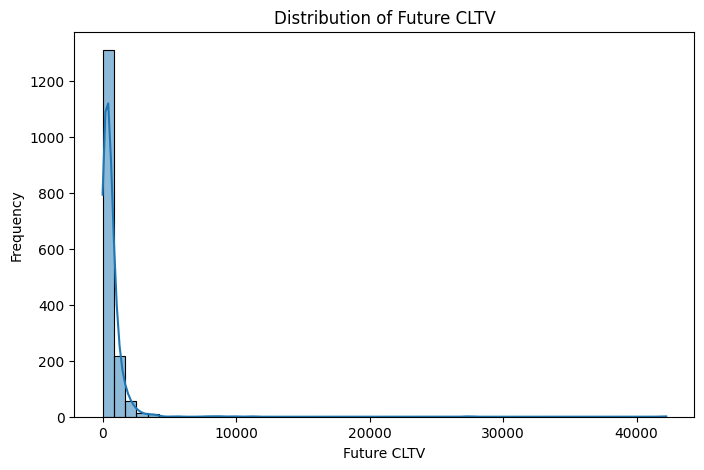

In [71]:
## Checking skewness in the target variable
plt.figure(figsize=(8, 5))
sns.histplot(cltv_df['Future_CLTV'], bins=50, kde=True)
plt.title('Distribution of Future CLTV')
plt.xlabel('Future CLTV')
plt.ylabel('Frequency')
plt.show()

In [72]:
## Checking skewness
skew_value = cltv_df['Future_CLTV'].skew()
print(f"Skewness: {skew_value:.2f}")


Skewness: 19.77


### Rule of thumb:

* Skew ≈ 0 → normal distribution

* Skew > 1 or < -1 → highly skewed

* Skew between 0.5 and 1 → moderately skewed

In [73]:
## Here our target value is highly skewed.

### Why This Matters:
- A skewed target can hurt linear models (like Linear Regression), which assume normally distributed residuals.

- Log transform compresses large values and spreads smaller ones — helping stabilize variance and normalize distributions.

In [74]:
# Log-transform target to reduce skew
cltv_df['Log_Future_CLTV'] = np.log1p(cltv_df['Future_CLTV'])

In [75]:
# Select features and target
X = cltv_df.drop(columns=['Future_CLTV', 'Log_Future_CLTV'])
y = cltv_df['Log_Future_CLTV']

In [76]:
X

,Recency,Customer_Age,Frequency,Total_Quantity,Monetary,Avg_Unit_Price,Country,Avg_Basket_Size,Avg_Days_Between_Purchases
0,80,237,5,1176,2339.96,2.881949,Iceland,235.200000,2.008547
1,22,224,7,409,2194.31,18.108286,Norway,58.428571,3.231884
2,195,80,2,618,1928.24,3.727000,Portugal,309.000000,2.051282
3,101,0,1,100,484.86,7.719167,Austria,100.000000,0.000000
4,9,236,6,1317,2896.30,3.413567,Belgium,219.500000,1.500000
...,...,...,...,...,...,...,...,...,...
1606,64,133,4,1105,1937.97,2.272264,United Kingdom,276.250000,1.247619
1607,208,0,1,20,51.00,2.550000,United Kingdom,20.000000,NaN
1608,76,0,1,27,86.29,6.430000,United Kingdom,27.000000,0.000000
1609,45,241,10,742,1120.67,1.685257,United Kingdom,74.200000,0.533632


In [77]:
y

,Log_Future_CLTV
0,7.173667
1,5.745340
2,4.083452
3,6.507516
4,7.724663
...,...
1606,6.846401
1607,3.951244
1608,4.367420
1609,6.882653


In [78]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Preprocessor (scaling + encoding)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['Country']

# Pipelines for each type
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


## 2. Model Selection and Training

In [80]:
# Defining models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}

In [81]:
# Loop through models

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred_log = pipeline.predict(X_test)

    # Convert back to original scale
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

In [82]:
## Printing results

print("\n Model Comparison Results (on Test Set):")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  MAE: £{metrics['MAE']:.2f}")
    print(f"  RMSE: £{metrics['RMSE']:.2f}")
    print(f"  R²: {metrics['R2']:.4f}")


 Model Comparison Results (on Test Set):

Linear Regression:
  MAE: £396.47
  RMSE: £1909.60
  R²: 0.3493

Random Forest:
  MAE: £399.55
  RMSE: £2129.90
  R²: 0.1905

XGBoost:
  MAE: £440.16
  RMSE: £2169.29
  R²: 0.1602


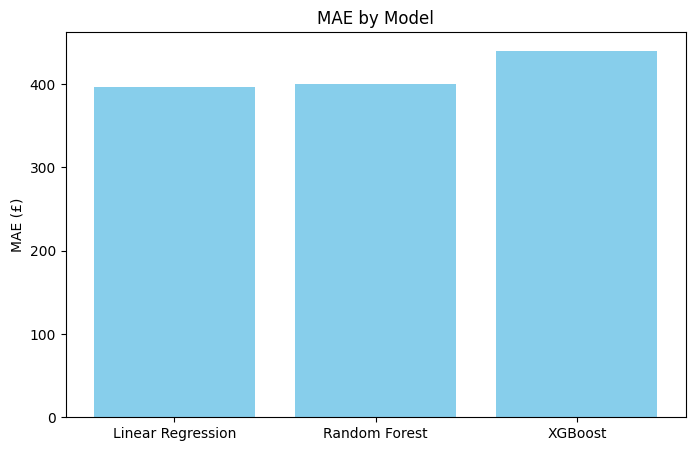

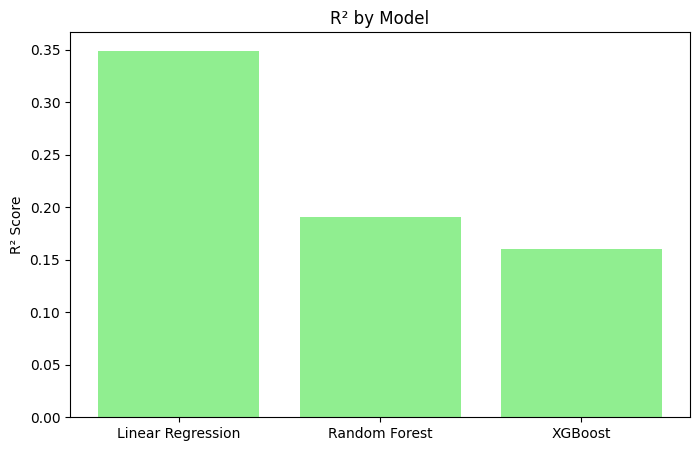

In [83]:
metrics_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Plot MAE comparison
plt.figure(figsize=(8,5))
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='skyblue')
plt.title('MAE by Model')
plt.ylabel('MAE (£)')
plt.show()

# Plot R² comparison
plt.figure(figsize=(8,5))
plt.bar(metrics_df['Model'], metrics_df['R2'], color='lightgreen')
plt.title('R² by Model')
plt.ylabel('R² Score')
plt.show()


### Linear Regression actually outperforms Random Forest and XGBoost!

- It has the lowest MAE (£396) → predictions are closest to true values on average.

- It has the lowest RMSE → fewer big errors.

- It has the highest R² (0.35) → explains ~35% of variance.

### Interpretations
- An MAE of £396 means on average, our CLTV predictions could be off by ~£400 per customer.

- An R² of 0.35 means our features explain about 35% of the variation in CLTV.

## Saving the best Model Pipeline

In [84]:
import cloudpickle
from sklearn.pipeline import Pipeline

best_model = LinearRegression()

# Create pipeline with your final preprocessor
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # your imputer, scaler, encoder
    ('regressor', best_model)
])

# Train on ALL data (X, y)
best_pipeline.fit(X, y)

# Save the fitted pipeline
with open('cltv_best_model.pkl', 'wb') as f:
    cloudpickle.dump(best_pipeline, f)

print("Best model (Linear Regression) saved as cltv_best_model.pkl")


Best model (Linear Regression) saved as cltv_best_model.pkl


In [86]:
with open('cltv_best_model.pkl', 'rb') as f:
    loaded_pipeline = cloudpickle.load(f)

print("Model loaded successfully!")


Model loaded successfully!


In [93]:
import sklearn
print(sklearn.__version__)

1.6.1


### Predict new customer CLTV

In [87]:
# Take a dummy customer record
X_new = pd.DataFrame({
    'Recency': [30],
    'Customer_Age': [200],
    'Frequency': [5],
    'Total_Quantity': [20],
    'Monetary': [500],
    'Avg_Unit_Price': [25],
    'Avg_Basket_Size': [4],
    'Avg_Days_Between_Purchases': [40],
    'Country': ['United Kingdom']
})

In [88]:
#  Predict using loaded pipeline
predicted_log_cltv = loaded_pipeline.predict(X_new)
predicted_cltv = np.expm1(predicted_log_cltv)  # back-transform

print("Predicted CLTVs (£):")
print(predicted_cltv)


Predicted CLTVs (£):
[90.20001829]


## Segmenting Customers by Predicted CLTV
Now, let’s:

- Predict future CLTV for all customers in the dataset.

- Use those predictions to segment them into value tiers.

In [89]:

final_df = pd.DataFrame({
    'CustomerID': X.index,  # Or your actual customer IDs
    'Predicted_CLTV': np.expm1(loaded_pipeline.predict(X))  # Back-transform if needed
})

# Segment customers using quantiles
final_df['Segment'] = pd.qcut(
    final_df['Predicted_CLTV'],
    q=4,                      # 3 segments: Low, Medium, High, Very High
    labels=['Low', 'Medium', 'High', 'Very High']
)

final_df


,CustomerID,Predicted_CLTV,Segment
0,0,1303.620000,Very High
1,1,715.306923,Very High
2,2,249.574884,Low
3,3,419.929426,High
4,4,864.798296,Very High
...,...,...,...
1606,1606,437.652866,High
1607,1607,186.666446,Low
1608,1608,208.390066,Low
1609,1609,370.248727,High


In [90]:
# See how many customers are in each segment
print(final_df['Segment'].value_counts())

Segment
Low          403
Medium       403
Very High    403
High         402
Name: count, dtype: int64


In [91]:
# See avg CLTV by segment
final_df.groupby('Segment')['Predicted_CLTV'].mean()

/tmp/ipython-input-91-2509378179.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df.groupby('Segment')['Predicted_CLTV'].mean()


,Predicted_CLTV
Segment,
Low,217.045275
Medium,298.616770
High,403.193227
Very High,1508.915575


In [92]:
segment_summary = final_df.groupby('Segment')['Predicted_CLTV'].agg(['count', 'mean', 'sum']).sort_index()
segment_summary

/tmp/ipython-input-92-3686183864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = final_df.groupby('Segment')['Predicted_CLTV'].agg(['count', 'mean', 'sum']).sort_index()


,count,mean,sum
Segment,,,
Low,403,217.045275,87469.245644
Medium,403,298.616770,120342.558320
High,402,403.193227,162083.677364
Very High,403,1508.915575,608092.976628


## **Business Recommendations**
#### Based on CLTV Segments:
**Very High & High CLTV Customers**
- Retention Focus: Offer loyalty programs, exclusive deals

- Upsell: Personalized product bundles, early access to new products

- Communication: VIP-level support, personal recommendations

**Mid CLTV Customers**
- Nurture Strategy: Offer time-bound discounts or cart abandonment reminders

- Incentives: Encourage higher order frequency or bigger baskets

**Low CLTV Customers**
- Cost Control: Limit marketing spend on this group

- Win-back Campaigns: Only if acquisition cost is low

- Feedback Collection: Understand why they don’t spend more

# **THANK YOU**